Gates' full, raw (unedited) code
Reference: Professor Ami Gates, Dept. Applied Math, Data Science, University of Colorado

[Dr. Gates' Website](https://gatesboltonanalytics.com/?page_id=768)

---

***Sentiment Analysis with NN/TF/Keras/Embedding***

**Directions:**

- Install keras
    1. Open a new command (or terminal) window. In Windows, this is called an Anaconda Prompt and you can access it my typing cmd into the windowns search area.
    2. Then, into the Anaconda prompt type `conda install -c conda-forge keras`
- RUN all of the following imports to assure that you have all the libraries/packages that you need. 


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding
import os
import matplotlib.pyplot as plt
import re
import shutil
import string
from tensorflow.keras import losses
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


print(tf.__version__)

2023-11-25 18:48:07.546485: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 18:48:07.595594: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.1


# Data


**READ ME** 

This first example is just an FYI for how to grab/download with Python a web datafile that is tarred and zipped.
This code is commented out (as the datafile is large)

The second example is a complete example that uses Log Reg and NNs (ANN and CNN) with various embedding options
That example set is below this first example.


## Getting Data - Example 1

There are many ways to get data

This example uses a dataset from stanford


In [2]:
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# ##cache_dir. Location to store cached files, 
# ## when None it defaults to the default directory ~/. keras/ 
# ##https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file
# MyPath="C:/Users/profa/Desktop/UCB/Text Mining/DATA/"
# ## Just download the data once
# ## After you download - find it on your computer and get the complete path
# dataset = tf.keras.utils.get_file("aclImdb", url,
#                                     untar=True, cache_dir=MyPath,
#                                     cache_subdir="StanfordData")

# DataPath = MyPath + "StanfordData/aclImdb"
# print(DataPath)
# os.listdir(DataPath)

# train_dir = os.path.join(DataPath, 'train')
# os.listdir(train_dir)

# test_dir = os.path.join(DataPath, 'test')
# os.listdir(test_dir)

# sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
# with open(sample_file) as f:
#   print(f.read())

## Example 2 : Sentiment Analysis with LR, ANN, CNN, Embeddings

Topics: Getting data, encoding (CountV, One-hot), Embedding (trained and Glove), Logistic Reg, ANNs, and CNN, with Sccuracy Vis

From <https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip>


**JK Note:**
For Dr. Gates `MyPath` was set to `"C:/Users/profa/Desktop/UCB/Text Mining/DATA/"`

I would like to set it to something more flexible.

```os.path.abspath("")```
gives the file path to the directory holding this Jupyter notebook.

Therefore...

In [3]:
# JK code
print("In this case:")
print("os.path.abspath("") =", os.path.abspath(""))

MyPath= os.path.abspath("") + "/SENT_DATA/"   # Need to create this folder first
print('MyPath =', MyPath)

In this case:
os.path.abspath() = /home/jasminekobayashi/gh_repos/Code-Reference-Notebook/CU-Boulder/NeuralNetworks/mrkdwn/Module3/other_extra
MyPath = /home/jasminekobayashi/gh_repos/Code-Reference-Notebook/CU-Boulder/NeuralNetworks/mrkdwn/Module3/other_extra/SENT_DATA/


In [4]:
# Dr. Gates code continues
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"

## Just download the data once
## After you download - find it on your computer and get the complete path
dataset = tf.keras.utils.get_file("SentimentData", url,
                                    untar=False,
                                    cache_dir=MyPath,   # defaults to "None", which sets to "~/.keras/"
                                    extract=True, 
                                    archive_format='zip',
                                    cache_subdir="SD")


DataPath2 = MyPath + str("SD/sentiment_labelled_sentences")   #JK: changed to directory created from above code (original directory name didn't work)
print(DataPath2)
os.listdir(DataPath2)


filepath_dict = {'yelp':  DataPath2+"/yelp_labelled.txt" ,
                 'amazon':  DataPath2+"/amazon_cells_labelled.txt",
                 'imdb':    DataPath2+"/imdb_labelled.txt"}

#print(filepath_dict["yelp"])
#yelp=filepath_dict["yelp"]
FILE=open(filepath_dict["yelp"])
for line in FILE:
    print(line)
FILE.close()

/home/jasminekobayashi/gh_repos/Code-Reference-Notebook/CU-Boulder/NeuralNetworks/mrkdwn/Module3/other_extra/SENT_DATA/SD/sentiment_labelled_sentences
Wow... Loved this place.	1

Crust is not good.	0

Not tasty and the texture was just nasty.	0

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1

The selection on the menu was great and so were the prices.	1

Now I am getting angry and I want my damn pho.	0

Honeslty it didn't taste THAT fresh.)	0

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0

The fries were great too.	1

A great touch.	1

Service was very prompt.	1

Would not go back.	0

The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.	0

I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!	1

I was disgusted because I was pretty sure that was human hair.	0

I was shocked because no signs indicate cash only.	0

Highly reco

<https://realpython.com/python-keras-text-classification/>


In [5]:
df_list = []
for source, filepath in filepath_dict.items():
    print("The source is\n", source)
    print("The filepath is\n", filepath)
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.head())

The source is
 yelp
The filepath is
 /home/jasminekobayashi/gh_repos/Code-Reference-Notebook/CU-Boulder/NeuralNetworks/mrkdwn/Module3/other_extra/SENT_DATA/SD/sentiment_labelled_sentences/yelp_labelled.txt
The source is
 amazon
The filepath is
 /home/jasminekobayashi/gh_repos/Code-Reference-Notebook/CU-Boulder/NeuralNetworks/mrkdwn/Module3/other_extra/SENT_DATA/SD/sentiment_labelled_sentences/amazon_cells_labelled.txt
The source is
 imdb
The filepath is
 /home/jasminekobayashi/gh_repos/Code-Reference-Notebook/CU-Boulder/NeuralNetworks/mrkdwn/Module3/other_extra/SENT_DATA/SD/sentiment_labelled_sentences/imdb_labelled.txt
                                            sentence  label source
0                           Wow... Loved this place.      1   yelp
1                                 Crust is not good.      0   yelp
2          Not tasty and the texture was just nasty.      0   yelp
3  Stopped by during the late May bank holiday of...      1   yelp
4  The selection on the menu was grea

## Create Training and Testing sets


In [6]:
#from sklearn.model_selection import train_test_split
df_yelp = df[df['source'] == 'yelp']
print(df_yelp)
sentences = df_yelp['sentence'].values
print(sentences)
y = df_yelp['label'].values
print(y)

                                              sentence  label source
0                             Wow... Loved this place.      1   yelp
1                                   Crust is not good.      0   yelp
2            Not tasty and the texture was just nasty.      0   yelp
3    Stopped by during the late May bank holiday of...      1   yelp
4    The selection on the menu was great and so wer...      1   yelp
..                                                 ...    ...    ...
995  I think food should have flavor and texture an...      0   yelp
996                           Appetite instantly gone.      0   yelp
997  Overall I was not impressed and would not go b...      0   yelp
998  The whole experience was underwhelming, and I ...      0   yelp
999  Then, as if I hadn't wasted enough of my life ...      0   yelp

[1000 rows x 3 columns]
['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Ric

## Vectorize


In [7]:
print(len(sentences)) ## 1000 sentences - type list
MyVect_CV=CountVectorizer(input="content")
#, stop_words="english",max_features=400)

1000


In [8]:
Vect_CV = MyVect_CV.fit_transform(sentences)
ColumnNames=MyVect_CV.get_feature_names_out()
CorpusDF_CV=pd.DataFrame(Vect_CV.toarray(),columns=ColumnNames)
print(CorpusDF_CV)

     00  10  100  11  12  15  17  1979  20  2007  ...  yelpers  yet  you  \
0     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
1     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
2     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
3     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
4     0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
..   ..  ..  ...  ..  ..  ..  ..   ...  ..   ...  ...      ...  ...  ...   
995   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
996   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
997   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
998   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   
999   0   0    0   0   0   0   0     0   0     0  ...        0    0    0   

     your  yourself  yucky  yukon  yum  yummy  zero  
0       0         0      0      0

In [9]:
for nextcol in CorpusDF_CV.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)):
        #print(nextcol)
         CorpusDF_CV= CorpusDF_CV.drop([nextcol], axis=1)
#    ## The following will remove any column with name
#    ## of 3 or smaller - like "it" or "of" or "pre".
#    ##print(len(nextcol))  ## check it first
#    ## NOTE: You can also use this code to CONTROL
#    ## the words in the columns. For example - you can
#    ## have only words between lengths 5 and 9. 
#    ## In this case, we remove columns with words <= 3.
    elif(len(str(nextcol))<3):
        #print(nextcol)
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)
    elif(len(str(nextcol))>20):
        #print(nextcol)
        CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)
    # elif(nextcol in RemoveWords):
    #     print(nextcol)
    #     CorpusDF_CV=CorpusDF_CV.drop([nextcol], axis=1)

print(CorpusDF_CV)

     about  above  absolute  absolutely  absolutley  accident  accommodations  \
0        0      0         0           0           0         0               0   
1        0      0         0           0           0         0               0   
2        0      0         0           0           0         0               0   
3        0      0         0           0           0         0               0   
4        0      0         0           0           0         0               0   
..     ...    ...       ...         ...         ...       ...             ...   
995      0      0         0           0           0         0               0   
996      0      0         0           0           0         0               0   
997      0      0         0           0           0         0               0   
998      0      0         0           0           0         0               0   
999      0      0         0           0           0         0               0   

     accomodate  accordingl

Put the label on for now so we can split the data up 
without messing up the labels


In [10]:
CorpusDF_CV["label"]=y
print(CorpusDF_CV)

     about  above  absolute  absolutely  absolutley  accident  accommodations  \
0        0      0         0           0           0         0               0   
1        0      0         0           0           0         0               0   
2        0      0         0           0           0         0               0   
3        0      0         0           0           0         0               0   
4        0      0         0           0           0         0               0   
..     ...    ...       ...         ...         ...       ...             ...   
995      0      0         0           0           0         0               0   
996      0      0         0           0           0         0               0   
997      0      0         0           0           0         0               0   
998      0      0         0           0           0         0               0   
999      0      0         0           0           0         0               0   

     accomodate  accordingl

## Create Training and Testing Data


In [11]:
TrainDF, TestDF = train_test_split(CorpusDF_CV,test_size=0.20)
print(TestDF)

     about  above  absolute  absolutely  absolutley  accident  accommodations  \
19       0      0         0           0           0         0               0   
489      0      0         0           0           0         0               0   
765      0      0         0           0           0         0               0   
631      0      0         0           0           0         0               0   
442      0      0         0           0           0         0               0   
..     ...    ...       ...         ...         ...       ...             ...   
70       0      1         0           0           0         0               0   
468      0      0         0           0           0         0               0   
1        0      0         0           0           0         0               0   
317      0      0         0           0           0         0               0   
756      0      0         0           0           0         0               0   

     accomodate  accordingl

Now - drop and save the labels for TrainDF and TestDF

In [12]:
TrainLabel=np.array(TrainDF["label"])
TrainDF=TrainDF.drop(["label"], axis=1)
print(TrainLabel[:6])
print(TrainDF.head())

[1 1 0 0 0 1]
     about  above  absolute  absolutely  absolutley  accident  accommodations  \
725      0      0         0           0           0         0               0   
335      0      0         0           0           0         0               0   
670      0      0         0           0           0         0               0   
281      0      0         0           0           0         0               0   
208      0      0         0           0           0         0               0   

     accomodate  accordingly  accountant  ...  yelpers  yet  you  your  \
725           0            0           0  ...        0    0    0     0   
335           0            0           0  ...        0    0    0     0   
670           0            0           0  ...        0    0    0     0   
281           0            0           0  ...        0    0    0     0   
208           0            0           0  ...        0    0    0     0   

     yourself  yucky  yukon  yum  yummy  zero  
725   

In [13]:
TestLabel=np.array(TestDF["label"])
TestDF=TestDF.drop(["label"], axis=1)
print(TestLabel[:6])
print(TestDF.head())

[0 1 0 1 1 0]
     about  above  absolute  absolutely  absolutley  accident  accommodations  \
19       0      0         0           0           0         0               0   
489      0      0         0           0           0         0               0   
765      0      0         0           0           0         0               0   
631      0      0         0           0           0         0               0   
442      0      0         0           0           0         0               0   

     accomodate  accordingly  accountant  ...  yelpers  yet  you  your  \
19            0            0           0  ...        0    0    0     0   
489           0            0           0  ...        0    0    0     0   
765           0            0           0  ...        0    0    0     0   
631           0            0           0  ...        0    0    0     0   
442           0            0           0  ...        0    0    0     0   

     yourself  yucky  yukon  yum  yummy  zero  
19    

# Logistic Regression for Prediction


In [14]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(TrainDF, TrainLabel)
score = LR_classifier.score(TestDF, TestLabel)

print("Accuracy:", score)

Accuracy: 0.8


# TF/Keras NN


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## Check shapes


In [16]:
print(type(TrainDF))
TrainDF_A = np.array(TrainDF)
print(TrainDF_A)
print(TrainDF_A.shape)
print(type(TrainDF_A))
print(type(TrainLabel))

<class 'pandas.core.frame.DataFrame'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(800, 1969)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
print(type(TestDF))
TestDF_A = np.array(TestDF)
print(TestDF_A)
print(TestDF_A.shape)
print(type(TestDF_A))
print(type(TestLabel))

<class 'pandas.core.frame.DataFrame'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(200, 1969)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
input_dim = TrainDF.shape[1]  # Number of features
print(input_dim)

1969


## Build model

In [19]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                19700     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 19,711
Trainable params: 19,711
Non-trainable params: 0
_________________________________________________________________


2023-11-25 18:48:11.644682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


In [20]:
print(type(TrainLabel))

<class 'numpy.ndarray'>


In [21]:
history = model.fit(TrainDF_A, TrainLabel,
                     epochs=100,
                     verbose=False,
                     validation_data=(TestDF_A, TestLabel),
                     batch_size=10)

#from tensorflow.keras.backend import clear_session
#clear_session()

In [22]:
loss, accuracy = model.evaluate(TrainDF_A, TrainLabel, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestDF_A, TestLabel, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7850


## Predictions
Generate a prediction using `model.predict()` 
and calculate it's shape:

In [23]:
print("Generate a prediction")
prediction = model.predict(TestDF_A)
#print(prediction)
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
#print(prediction)

Generate a prediction
7/7 [==============================] - 0s 2ms/step
prediction shape: (200, 1)


## Confusion matrices

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction, TestLabel))

[[76 14]
 [29 81]]


In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

print(history.history)
print(history.history["accuracy"])

{'loss': [0.6870507597923279, 0.6307441592216492, 0.5370123982429504, 0.4302316904067993, 0.33931785821914673, 0.26787135004997253, 0.21537236869335175, 0.17509156465530396, 0.1444678157567978, 0.1204148456454277, 0.10154321789741516, 0.08666147291660309, 0.07415203750133514, 0.06449618935585022, 0.05588680878281593, 0.0489974245429039, 0.04311945289373398, 0.03813124820590019, 0.03397829830646515, 0.03038988634943962, 0.027114547789096832, 0.02449823170900345, 0.022011246532201767, 0.01997738517820835, 0.018147427588701248, 0.016553757712244987, 0.015047330409288406, 0.013752907514572144, 0.012645594775676727, 0.011623206548392773, 0.01073283888399601, 0.009839795529842377, 0.009140043519437313, 0.008451610803604126, 0.007825580425560474, 0.007263432256877422, 0.006770683918148279, 0.006283462513238192, 0.00585837522521615, 0.005455655977129936, 0.005097523331642151, 0.004765941295772791, 0.004446689505130053, 0.004170747008174658, 0.003916377201676369, 0.003676330205053091, 0.0034457

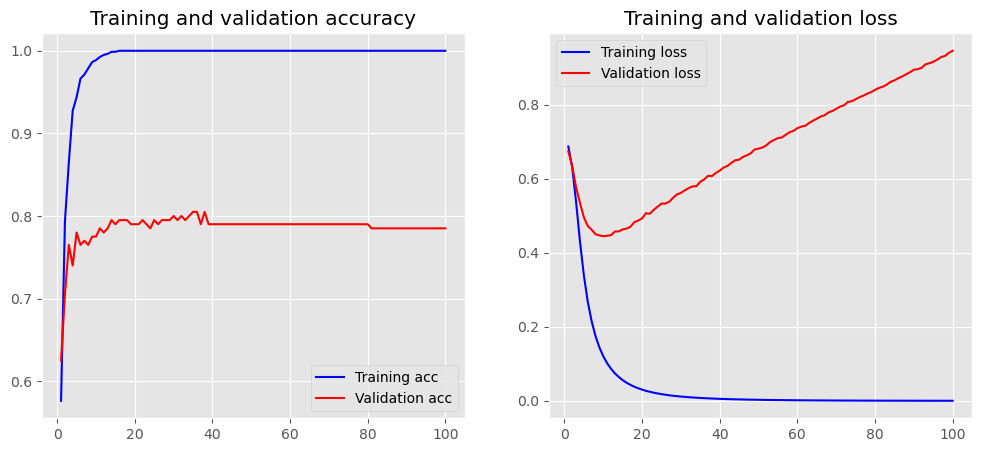

In [26]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    

plot_history(history)

JK Note: I don't really know why the following is commented out but left in the example code, but I still left it in just in case.

In [27]:
#for i in range(0, 199):
#    if(prediction[i][0].astype(np.int32) != TestLabel[i].astype(np.int32)):
#        print(i)
        # print(prediction[i][0])
        # print(TestLabel[i])
        # print(TestDF_A[i])
        # print(TestDF.iloc[i])

# Word Embedding

One way to represent a word as a vector (rather than a count such as above)
is to use "encoding" - such as one-hot-encoding.
In this case, we would first need the length of the vocabulary. 
Next, each vector is the vocab length where all values are 0
except for the one value (which is a 1) for that word.


 Here is a small example of one-hot encoding

## Example 1: Basic encoding with numbers


In [28]:
Words=["My", "dog", "will", "hike", "the", "hike", "with", "my", "dog", "is", "fun", 
       "the", "hike", "is", "long"]
print(Words)
print(type(Words))

['My', 'dog', 'will', 'hike', 'the', 'hike', 'with', 'my', 'dog', 'is', 'fun', 'the', 'hike', 'is', 'long']
<class 'list'>


In [29]:
#from sklearn.preprocessing import LabelEncoder

MyEncoder = LabelEncoder() #instantiate
WordLabels_0_1= MyEncoder.fit_transform(Words)
print(WordLabels_0_1)
print(type(WordLabels_0_1))

[0 1 8 3 7 3 9 6 1 4 2 7 3 4 5]
<class 'numpy.ndarray'>


## Example 2 - One-hot Encoding

Note that Example 2 uses the output from Example 1 above


In [30]:
SentenceLength=len(WordLabels_0_1)
My_1_Hot_encoder = OneHotEncoder(sparse=False)
WordLabelsOneHot = WordLabels_0_1.reshape((SentenceLength, 1))
WordEncode=My_1_Hot_encoder.fit_transform(WordLabelsOneHot)
print(WordEncode)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


/home/jasminekobayashi/anaconda3/envs/code-ref-notebook/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Example 3 - Embedding

***Embeddings*** represent words as dense word vector
So a vector for each word where the vector is not 0 and 1
but rather uses values that better describe the "meaning"
of the word. 

**Word Embedding Goa:** map semantic meaning into a geometric space. 
This geometric space is then called the embedding space.

**How to create word embeddings:**

One way is to train your word embeddings during the training 
of your neural network. The other way is by using pretrained 
word embeddings which you can directly use in your model.

Now you need to tokenize the data into a format that can be used 
by the word embeddings. Keras offers a couple of methods for text 
preprocessing and sequence preprocessing 
You can start by using the Tokenizer utility class 
which can vectorize a text corpus into a list of integers. 
Each integer maps to a value in a dictionary that encodes 
the entire corpus, with the keys in the dictionary being 
the vocabulary terms themselves. You can add the parameter num_words, 
which is responsible for setting the size of the vocabulary. 

Here we need a LIST of the documents - in this case a list of the sentences

In [31]:
print(sentences) ## data as sentences
print(y)  ## labels of each sentence

['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.'
 'Now I am getting angry and I want my damn pho.'
 "Honeslty it didn't taste THAT fresh.)"
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'
 'The fries were great too.' 'A great touch.' 'Service was very prompt.'
 'Would not go back.'
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!'
 'I was disgusted because I was pretty sure that was human hair.'
 'I was shocked because no signs indicate cash only.'
 'Highly recommended.' 'Waitress was a little slow in service.'
 'This place is not worth your time, let alone Vegas.'
 'did not like at all.' 'The Burrittos Blah!' 

### Check lengths

In [32]:
print(len(y))
print(len(sentences))
print(type(sentences))

1000
1000
<class 'numpy.ndarray'>


In [33]:
MyTokenizer = Tokenizer(num_words=5000)
MyTokenizer.fit_on_texts(sentences)

AllData= MyTokenizer.texts_to_sequences(sentences)
vocab_size = len(MyTokenizer.word_index) + 1  
print(vocab_size)

2072


Let's see some sentences and numeric embedding

In [34]:
for i in range(0,20):
    print(sentences[i])
    print(AllData[i])

Wow... Loved this place.
[428, 165, 8, 15]
Crust is not good.
[586, 7, 12, 16]
Not tasty and the texture was just nasty.
[12, 151, 2, 1, 429, 4, 46, 430]
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
[587, 73, 292, 1, 588, 293, 898, 899, 180, 900, 901, 431, 2, 165, 9]
The selection on the menu was great and so were the prices.
[1, 166, 35, 1, 109, 4, 22, 2, 26, 27, 1, 167]
Now I am getting angry and I want my damn pho.
[140, 3, 262, 201, 902, 2, 3, 131, 20, 350, 263]
Honeslty it didn't taste THAT fresh.)
[903, 9, 132, 133, 24, 122]
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
[1, 432, 27, 37, 904, 2, 32, 105, 264, 34, 23, 65, 100, 55, 905, 10, 40, 123, 294, 433, 5, 906]
The fries were great too.
[1, 181, 27, 22, 110]
A great touch.
[5, 22, 589]
Service was very prompt.
[17, 4, 19, 907]
Would not go back.
[51, 12, 38, 31]
The cashier had no care what so ever on what I had to say 

The indexing is ordered by most common words in the text. For example, "the" is "1".

In [35]:
for word in ['the', 'all', 'happy', 'sad']:
    print(word, ":", MyTokenizer.word_index[word])

the : 1
all : 39
happy : 231
sad : 391


**Notice:** scikit-learn’s `CountVectorizer` creates vectors of word COUNTS
without order.
The `Tokenizer()` keeps order an replaces each word with a number.

### Padding each sentence vector

Right now, each sentence vector is a different length. This does not work well with NNs

We can *PAD* each - so that all have the same length.

`maxlen` parameter - specify how long the sequences should be.


In [36]:
maxlen = 100

AllData = pad_sequences(AllData, padding='post', maxlen=maxlen)
print(AllData[0, :]) ## Row 0 and all columns
print(AllData)
print(type(y))
print(y[0])

[428 165   8  15   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[[428 165   8 ...   0   0   0]
 [586   7  12 ...   0   0   0]
 [ 12 151   2 ...   0   0   0]
 ...
 [207   3   4 ...   0   0   0]
 [  1 833  81 ...   0   0   0]
 [200  44  49 ...   0   0   0]]
<class 'numpy.ndarray'>
1


### Training and Testing set

Right now, we have our sentences - our data embedded as sequential and numeric - with padding.

However - We do not yet have a Training and Testing set

Let's create these...


In [37]:
print(type(AllData)) ## numpy array
print(AllData.shape) ## 1000 by 100
print(AllData)
print(AllData[1])

<class 'numpy.ndarray'>
(1000, 100)
[[428 165   8 ...   0   0   0]
 [586   7  12 ...   0   0   0]
 [ 12 151   2 ...   0   0   0]
 ...
 [207   3   4 ...   0   0   0]
 [  1 833  81 ...   0   0   0]
 [200  44  49 ...   0   0   0]]
[586   7  12  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [38]:
MySample=np.random.choice(1000, size=200, replace=False, p=None)
print(MySample)

[163 566 634 489 789 576 934 768  82 893  92 984 927 746 831 845 528 544
 112 575 668 929 833 176 259  40 115 441 657 836 186 730 463 521  12 996
 904 183 436 796 443 769 894 349  30 785 859 901 752 245   9 564 150 535
 189 968 698 246 285 636 624 459 341 683 244   0 407 132 775 135  54 228
 973 585 766 551 167 158 696 260 348 273 676 549 314 807 931 391 642 433
 851 699 404 582 905 255 526 688 398 507 753 218 210 780 830  19 571 989
 917 971 350 325 102  25 838 362 842   1 603 342 203 187 740 970  71 684
 867 963 295 599 532 193 710 606 951 266 290 661  20 146 374 324 179 662
 215 728 224 293  70 422 298 358 413 527 749 569 548 802 519 618 462 357
 946 607 263 815 955 165 494 321 849  26 561 687 580 654  50 919 655 913
 432 928 617 503 568  56 591 810 622 500 105 219 751 363 976  22 704 237
 960 651]


In [39]:
TestingData=[]
TrainingData=[]
TrainingLabels=[]
TestingLabels=[]

for i in range(0,1000):
    #print(i)
    if i in MySample:
        TestingData.append(AllData[i])
        TestingLabels.append(y[i])
    else:
        TrainingData.append(AllData[i])
        TrainingLabels.append(y[i])

In [40]:
TestingData=np.array(TestingData)
print(TestingData)
print(len(TestingData))
print(TestingLabels)
print(len(TestingLabels))

[[ 428  165    8 ...    0    0    0]
 [ 586    7   12 ...    0    0    0]
 [   5   22  589 ...    0    0    0]
 ...
 [  39   14   39 ...    0    0    0]
 [   3   51  329 ...    0    0    0]
 [2064 2065  564 ...    0    0    0]]
200
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
200


In [41]:
TrainingData=np.array(TrainingData)
print(TrainingData)
print(len(TrainingData))
print(TrainingLabels)
print(len(TrainingLabels))

[[ 12 151   2 ...   0   0   0]
 [587  73 292 ...   0   0   0]
 [  1 166  35 ...   0   0   0]
 ...
 [207   3   4 ...   0   0   0]
 [  1 833  81 ...   0   0   0]
 [200  44  49 ...   0   0   0]]
800
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,

Now we can use Keras to create BETTER embeddings
while also training our NN model.


In [42]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           103600    
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 104,121
Trainable params: 104,121
Non-trainable params: 0
_________________________________________________________________


In [43]:
print(type(TrainingData))
print(type(TrainingLabels))

<class 'numpy.ndarray'>
<class 'list'>


In [44]:
## !! The labels need to be an array!
TrainingLabels=np.array(TrainingLabels)
print(type(TrainingLabels))

<class 'numpy.ndarray'>


In [45]:
print(type(TestingData))
print(type(TestingLabels))
TestingLabels=np.array(TestingLabels)
print(type(TestingLabels))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


Epoch 1/50
80/80 [==============================] - 1s 7ms/step - loss: 0.6898 - accuracy: 0.5900 - val_loss: 0.6868 - val_accuracy: 0.5350
Epoch 2/50
80/80 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6350 - val_loss: 0.6480 - val_accuracy: 0.7700
Epoch 3/50
34/80 [===========>..................] - ETA: 0s - loss: 0.5783 - accuracy: 0.8824

80/80 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.8612 - val_loss: 0.5671 - val_accuracy: 0.8050
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.9262 - val_loss: 0.4738 - val_accuracy: 0.8400
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.9563 - val_loss: 0.4017 - val_accuracy: 0.8400
Epoch 6/50
80/80 [==============================] - 0s 4ms/step - loss: 0.1571 - accuracy: 0.9737 - val_loss: 0.3652 - val_accuracy: 0.8450
Epoch 7/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0970 - accuracy: 0.9875 - val_loss: 0.3524 - val_accuracy: 0.8250
Epoch 8/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9925 - val_loss: 0.3407 - val_accuracy: 0.8400
Epoch 9/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9975 - val_loss: 0.3360 - val_accuracy: 0.8350
Epoch 10/50
80/80 [============

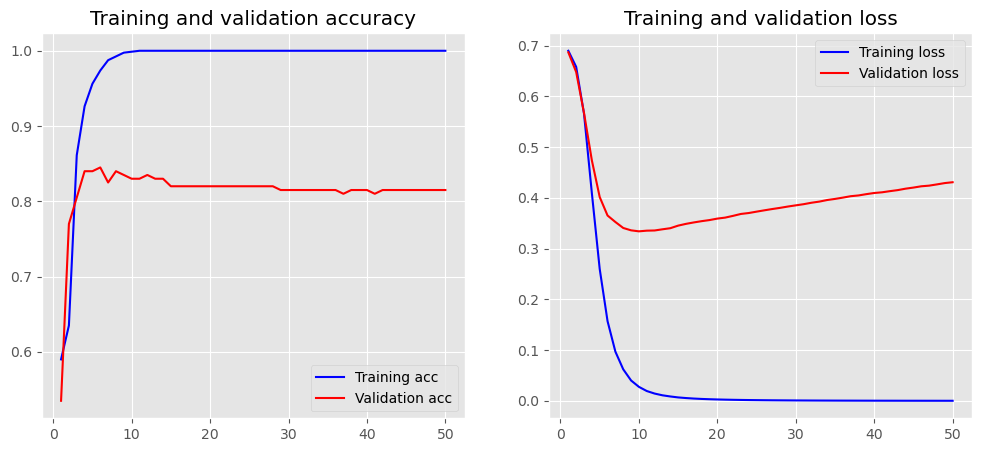

In [46]:
history = model.fit(TrainingData, TrainingLabels,
                    epochs=50,
                    verbose=True,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)

loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

# Using other word embedding options

## Word2Vec or Glove

### RE:

An alternative is to use a precomputed embedding 
space that utilizes a much larger corpus.
It is possible to precompute word embeddings by 
simply training them on a large corpus of text. 
Among the most popular methods are `Word2Vec` 
developed by Google and `GloVe` (Global Vectors for Word 
Representation) developed by the Stanford NLP Group.

#### `Word2Vec` Paper

<https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf>

Uses neural networks.

Pretrained embeddings: <https://code.google.com/archive/p/word2vec/>

#### `Glove`
<https://nlp.stanford.edu/projects/glove/>

Uses co-occurrence matrix and matrix factorization.

Glove Pretrained: `GLove6B.zip` here: <https://nlp.stanford.edu/projects/glove/>

Self-training via Gemsim here:
<https://radimrehurek.com/gensim/models/word2vec.html>


Using `GLove` and <https://nlp.stanford.edu/projects/glove/>  (`Glove6B.zip`)

- **Step 1:** Go to the link and download `Glove6B.zip` to your computer
- **Step 2:** Unzip and place the 4 Glove txt files into a folder

My folder is here: `C:\Users\profa\Desktop\UCB\Text Mining\DATA\GLOVE`

The 4 files are: `glove.6B.50d.txt`, `glove6B.100d.txt`, `glove.6B.200d.txt`, 
and `glove.6B.300d.txt`


## GLove data
Let's have a look at the 50d where each word is represented by a vector with 50
values. 


In [47]:
## Maximize limit as this is a large file
# csv.field_size_limit(sys.maxsize)

GlovePath= os.path.abspath("") + "/GLOVE/glove.6B.50d.txt"

#import numpy as np
print(MyTokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'was': 4, 'a': 5, 'to': 6, 'is': 7, 'this': 8, 'it': 9, 'of': 10, 'food': 11, 'not': 12, 'for': 13, 'in': 14, 'place': 15, 'good': 16, 'service': 17, 'we': 18, 'very': 19, 'my': 20, 'with': 21, 'great': 22, 'had': 23, 'that': 24, 'be': 25, 'so': 26, 'were': 27, 'are': 28, 'but': 29, 'have': 30, 'back': 31, 'you': 32, 'here': 33, 'they': 34, 'on': 35, 'at': 36, 'like': 37, 'go': 38, 'all': 39, 'time': 40, 'our': 41, 'will': 42, 'there': 43, 'as': 44, 'really': 45, 'just': 46, 'an': 47, 'their': 48, 'if': 49, 'best': 50, 'would': 51, 'ever': 52, 'also': 53, 'friendly': 54, 'up': 55, 'only': 56, 'never': 57, 'one': 58, 'no': 59, 'your': 60, 'restaurant': 61, 'out': 62, 'nice': 63, "don't": 64, 'been': 65, 'what': 66, 'amazing': 67, 'again': 68, 'from': 69, 'delicious': 70, 'vegas': 71, 'did': 72, 'by': 73, 'which': 74, 'pretty': 75, 'some': 76, 'me': 77, 'came': 78, 'when': 79, "i've": 80, 'experience': 81, "i'm": 82, 'staff': 83, 'get': 84, 'eat': 85, 'us': 8

In [48]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    #print(embedding_matrix.shape)

    with open(filepath, encoding='UTF-8') as f: ## You MUST specify the encoding!
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                #print(word)
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

Check on the results

In [49]:
embedding_dim = 50 ## Because we are using glove.6B.50d.txt
embedding_matrix = create_embedding_matrix(GlovePath, MyTokenizer.word_index, embedding_dim)
print(type(embedding_matrix))
print(embedding_matrix[0])
TheWord=list(filter(lambda x: MyTokenizer.word_index[x] == 1, MyTokenizer.word_index))[0]
print(TheWord)
print("Word: ",TheWord, "\nEmbedding: ", embedding_matrix[1])

<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
the
Word:  the 
Embedding:  [ 4.18000013e-01  2.49679998e-01 -4.12420005e-01  1.21699996e-01
  3.45270008e-01 -4.44569997e-02 -4.96879995e-01 -1.78619996e-01
 -6.60229998e-04 -6.56599998e-01  2.78430015e-01 -1.47670001e-01
 -5.56770027e-01  1.46579996e-01 -9.50950012e-03  1.16579998e-02
  1.02040000e-01 -1.27920002e-01 -8.44299972e-01 -1.21809997e-01
 -1.68009996e-02 -3.32789987e-01 -1.55200005e-01 -2.31309995e-01
 -1.91809997e-01 -1.88230002e+00 -7.67459989e-01  9.90509987e-02
 -4.21249986e-01 -1.95260003e-01  4.00710011e+00 -1.85939997e-01
 -5.22870004e-01 -3.16810012e-01  5.92130003e-04  7.44489999e-03
  1.77780002e-01 -1.58969998e-01  1.20409997e-02 -5.42230010e-02
 -2.98709989e-01 -1.57490000e-01 -3.47579986e-01 -4.56370004e-02
 -4.42510009e-01  1.87849998e-01  2.78489990e-03 -1.84110001e-01
 -1.15139998e-

In [50]:
TheWord=list(filter(lambda x: MyTokenizer.word_index[x] == 25, MyTokenizer.word_index))[0]
print("Word: ",TheWord, "\nEmbedding: ", embedding_matrix[25])

Word:  be 
Embedding:  [ 9.11019981e-01 -2.28719994e-01  2.07699999e-01 -2.02370003e-01
  5.06969988e-01 -5.78930005e-02 -4.17290002e-01 -7.53410012e-02
 -3.04540008e-01 -3.28600011e-03  4.44810003e-01  4.18179989e-01
 -3.34089994e-01  3.29170004e-02  9.88720000e-01  9.19839978e-01
  4.05209988e-01  1.92499999e-02 -1.05200000e-01 -7.98650026e-01
 -3.64030004e-01 -8.79950002e-02  7.21819997e-01  1.11139998e-01
  2.15299994e-01 -1.94110000e+00 -2.63760000e-01  4.45499986e-01
  2.75860012e-01 -2.11040005e-01  4.02120018e+00 -6.19429983e-02
 -3.21339995e-01 -8.19220006e-01  2.10800007e-01 -2.04139993e-01
  7.26249993e-01  4.75169986e-01 -3.98530006e-01 -3.91680002e-01
 -3.45809996e-01  2.59280000e-02  1.30720004e-01  7.35620022e-01
 -1.51989996e-01 -1.84389994e-01 -6.71280026e-01  1.66920006e-01
 -5.00629991e-02  1.92410007e-01]


How many of the embedding vectors are nonzero?

In [51]:
nonzero_Emb_Vectors = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_Emb_Vectors / vocab_size   ## We have captured > 95% of our words

0.9507722007722008

## Using the NN with Glove Embeddings


In [52]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], ## Our Glove Embeddings
                           input_length=maxlen, 
                           trainable=False))  ## You can put True here as well to train the 
                                              ## embeddings.  
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           103600    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 104,121
Trainable params: 521
Non-trainable params: 103,600
_________________________________________________________________


Training Accuracy: 0.7375
Testing Accuracy:  0.7300


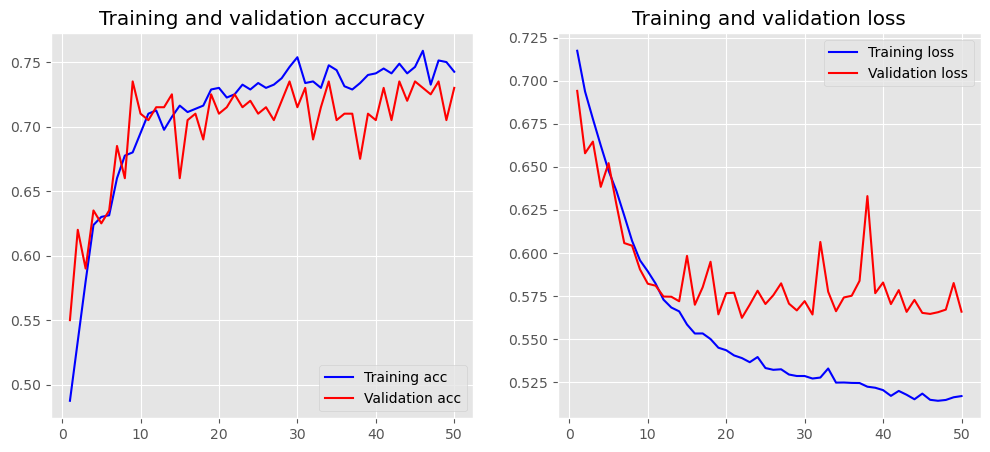

In [53]:
history = model.fit(TrainingData, TrainingLabels,
                    epochs=50,
                    verbose=False,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)
loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

## Using a CNN for this same prediction

Convolutional NNs for sentiment analysis

A CNN has hidden layers which are called convolutional layers. 
When you think of images, a computer has to deal with 
a two dimensional matrix of numbers and therefore you need 
some way to detect features in this matrix. 
These convolutional layers are able to detect edges, 
corners and other kinds of textures which makes them such a 
special tool. The convolutional layer consists of 
multiple filters which are slid across the image and 
are able to detect specific features.

<https://realpython.com/python-keras-text-classification/>

When you are working with sequential data, like text, you work 
with one dimensional convolutions, but the idea and the application 
stays the same. You still want to pick up on patterns in the sequence 
which become more complex with each added convolutional layer.


In [54]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          207200    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 272,629
Trainable params: 272,629
Non-trainable params: 0
________________________________________________

Epoch 1/10


80/80 [==============================] - 2s 13ms/step - loss: 0.6839 - accuracy: 0.5950 - val_loss: 0.6548 - val_accuracy: 0.7350
Epoch 2/10
80/80 [==============================] - 1s 9ms/step - loss: 0.4663 - accuracy: 0.8700 - val_loss: 0.3960 - val_accuracy: 0.8250
Epoch 3/10
80/80 [==============================] - 1s 9ms/step - loss: 0.1456 - accuracy: 0.9600 - val_loss: 0.3759 - val_accuracy: 0.8300
Epoch 4/10
80/80 [==============================] - 1s 9ms/step - loss: 0.0346 - accuracy: 0.9962 - val_loss: 0.3864 - val_accuracy: 0.8350
Epoch 5/10
80/80 [==============================] - 1s 8ms/step - loss: 0.0101 - accuracy: 0.9987 - val_loss: 0.4510 - val_accuracy: 0.8300
Epoch 6/10
80/80 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.4535 - val_accuracy: 0.8400
Epoch 7/10
80/80 [==============================] - 1s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4731 - val_accuracy: 0.8300
Epoch 8/10
80/80 [============

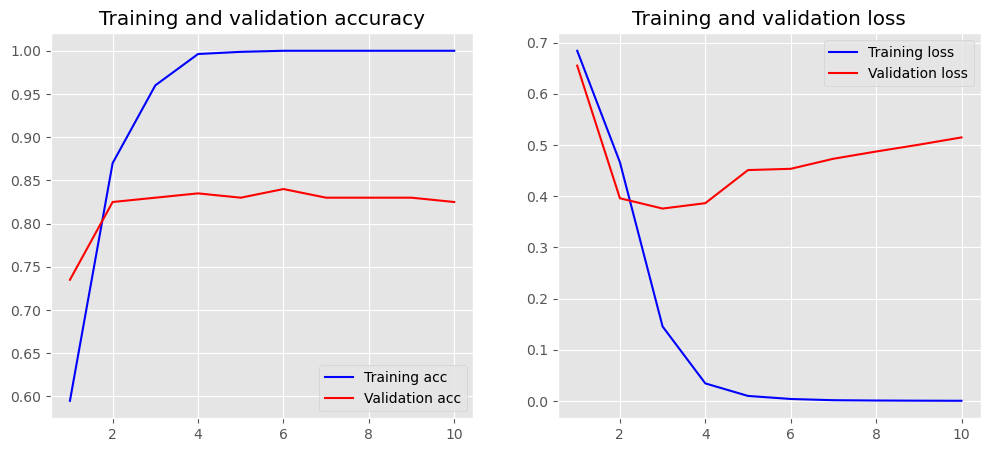

In [55]:
history = model.fit(TrainingData, TrainingLabels,
                    epochs=10,
                    verbose=True,
                    validation_data=(TestingData, TestingLabels),
                    batch_size=10)
loss, accuracy = model.evaluate(TrainingData, TrainingLabels, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(TestingData, TestingLabels, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)